In [7]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

data = pd.read_csv("dataset/data/feathers_data_normalized.csv")

sizes = pd.DataFrame(columns=["width", "height"])

for index, row in data.iterrows():
    filename = row['filename'].split("_")
    path_to = os.path.join("dataset", "images", filename[0], "_".join(filename[1:-1]), row['filename'])
    
    img = Image.open(path_to)
    width, height = Image.open(path_to).size
    if width > height:
        img = img.rotate(90, expand=True)
    img = img.resize((40, 240))

    width, height = img.size
    if width > height:
        width, height = height, width
    sizes.loc[len(sizes)] = {"width": width, "height": height}

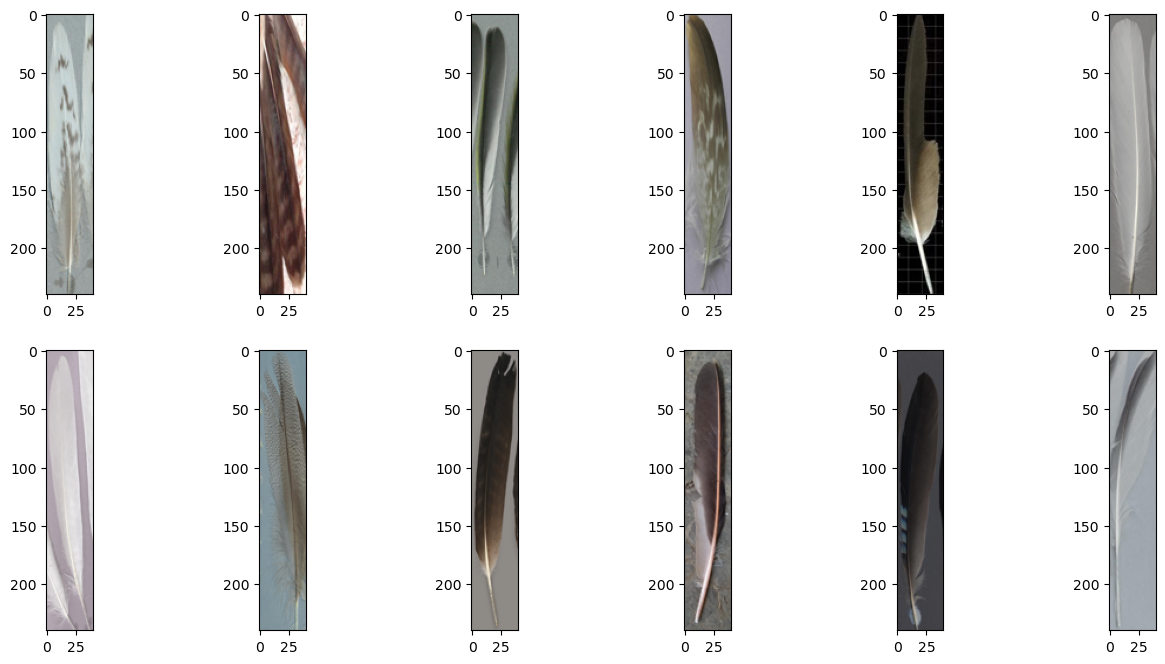

In [5]:
plt.figure(figsize=(16, 8))
i = 1
for index, row in data.sample(n=12).iterrows():
    filename = row['filename'].split("_")
    path_to = os.path.join("dataset", "images", filename[0], "_".join(filename[1:-1]), row['filename'])

    img = Image.open(path_to)
    width, height = Image.open(path_to).size
    if width > height:
        img = img.rotate(90, expand=True)
    img = img.resize((40, 240))
    _ = plt.subplot(2, 6, i)
    plt.imshow(img)
    i+=1

plt.show()


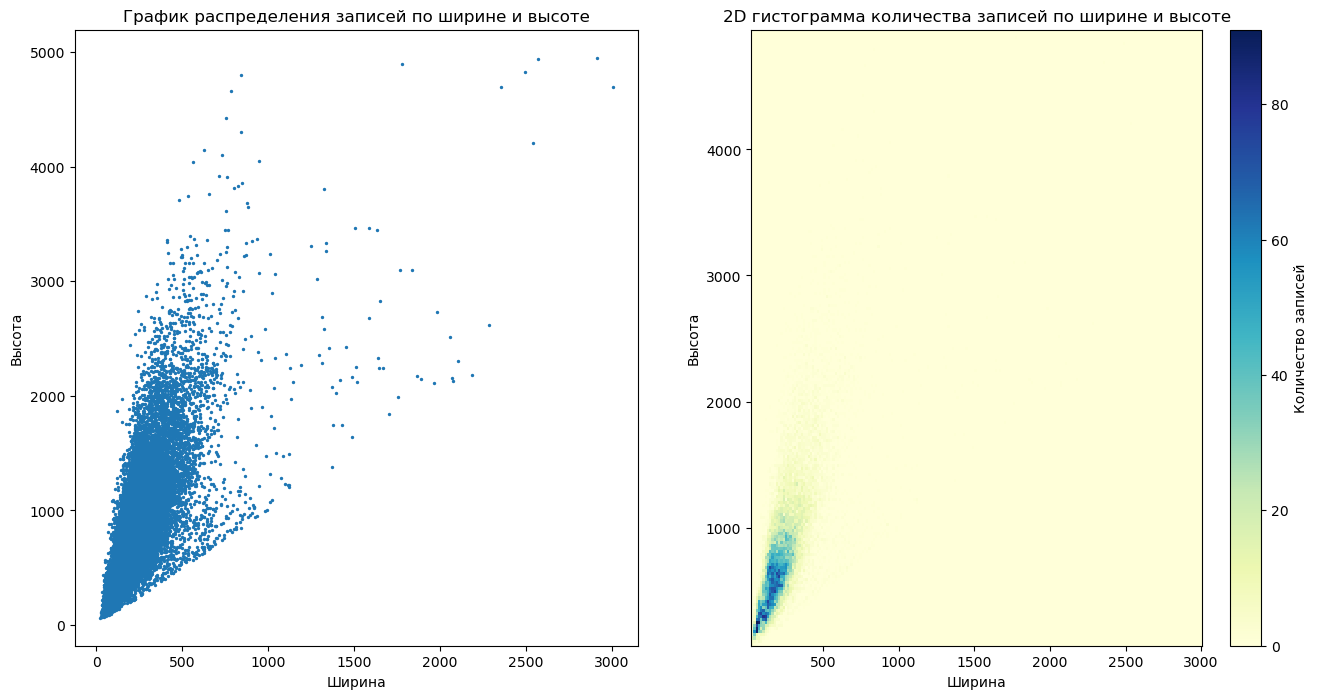

In [6]:

plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.scatter(sizes['width'], sizes['height'], s=2)
plt.xlabel("Ширина")
plt.ylabel("Высота")
plt.title("График распределения записей по ширине и высоте")

plt.subplot(122)
plt.hist2d(sizes['width'], sizes['height'], bins=(200, 200), cmap="YlGnBu")
plt.xlabel("Ширина")
plt.ylabel("Высота")
plt.title("2D гистограмма количества записей по ширине и высоте")
plt.colorbar(label="Количество записей")

plt.savefig("p5.png")
plt.show()

In [ ]:
import torch

